In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Creating a binary target variable based on the median sale price
median_price = data['SalePrice'].median()
data['PriceCategory'] = (data['SalePrice'] > median_price).astype(int)  # 1 for high, 0 for low

# Selecting the features and the new binary target
X = data[['LotArea']]  # Using LotArea as an example feature
y = data['PriceCategory']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5)  # Limit the depth of the tree to prevent overfitting

# Fitting the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Saving house price dataset.csv to house price dataset.csv
Accuracy: 0.65
Confusion Matrix:
[[96 65]
 [37 94]]


<ipython-input-2-a5dc7d113cca>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled, y_test, c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x', label='Test Data')


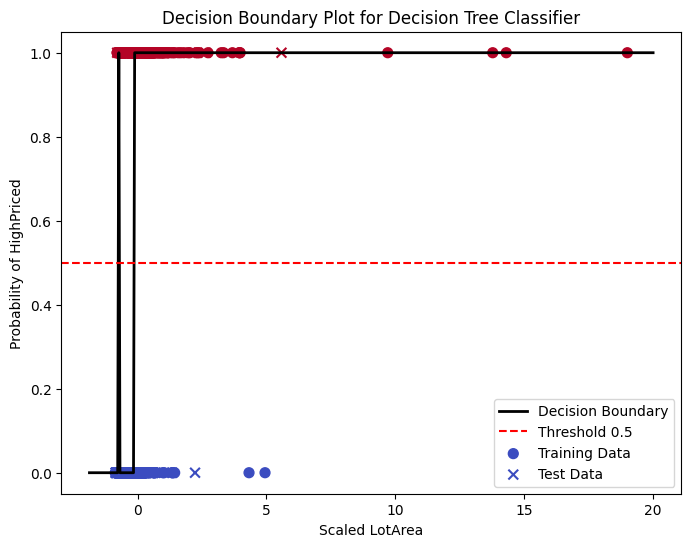

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for plotting
x_min, x_max = X_train_scaled.min() - 1, X_train_scaled.max() + 1
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predict the decision function for each point in the meshgrid
yy = model.predict(xx)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, color='black', linewidth=2, label='Decision Boundary')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')

# Plot the original data points
plt.scatter(X_train_scaled, y_train, c=y_train, cmap='coolwarm', s=50, label='Training Data')
plt.scatter(X_test_scaled, y_test, c=y_test, cmap='coolwarm', s=50, edgecolors='k', marker='x', label='Test Data')

plt.xlabel('Scaled LotArea')
plt.ylabel('Probability of HighPriced')
plt.title('Decision Boundary Plot for Decision Tree Classifier')
plt.legend()
plt.show()